# Part I - Ford Gobike Data Exploration
## by Tala AbuSoud

## Introduction

The Ford GoBike System Dataset (February 2019) contains detailed trip data from a bike sharing service in the San Francisco Bay Area. Each row represents an individual bike trip and includes various features such as:
- Trip duration (sec)
- Start and end times
- Start and end stations
- User type (Subscriber or Customer)
- User demographics (gender, birth year)
- Bike ID


Let’s define a few key questions for analysis:
- What is the distribution of trip durations?
- How does trip duration vary with user type (Subscriber vs Customer)?
- Are there any usage patterns based on gender or age group?
- Are there peak hours for bike usage?

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

The dataset contains 183412 rows with 16 columns

---

Now we'll see an overview of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df['user_type'].value_counts()

user_type
Subscriber    163544
Customer       19868
Name: count, dtype: int64

In [6]:
df['member_gender'].value_counts()

member_gender
Male      130651
Female     40844
Other       3652
Name: count, dtype: int64

In [7]:
df['bike_share_for_all_trip'].value_counts()

bike_share_for_all_trip
No     166053
Yes     17359
Name: count, dtype: int64

* To fix the data types:

In [8]:
# Convert to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Convert birth year to integer 
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

# Convert categorical columns
categorical_cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [9]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   Int64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

---
Now lets seach for null values

In [10]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
# drop null values since they are 197 entry only
df = df.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])

# convert type to int 
df['start_station_id'] = df['start_station_id'].astype('int64')
df['end_station_id'] = df['end_station_id'].astype('int64')


In [12]:
# since they have many nulls (8265) we will fill with a placeholder
df['member_gender'] = df['member_gender'].cat.add_categories('Unknown').fillna('Unknown')
df['member_birth_year'] = df['member_birth_year'].fillna(0)

In [13]:
# Calculate age based on birth year
# set age as missing (NA) where birth year is 0
df['age'] = 2019 - df['member_birth_year']
df.loc[df['member_birth_year'] == 0, 'age'] = pd.NA

In [14]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender                 0
bike_share_for_all_trip       0
age                        8263
dtype: int64

In [15]:
df['age'].describe()

count     174952.0
mean     34.196865
std      10.118731
min           18.0
25%           27.0
50%           32.0
75%           39.0
max          141.0
Name: age, dtype: Float64

The maximum age value of 141 is considered an outlier, so we will remove it.

Then, we will fill the missing age values with the median age because it is less affected by outliers and better represents the typical user age.

In [16]:
#  max age at 90 to remove unrealistic outlier
df.loc[df['age'] > 90, 'age'] = 90

# Fill missing ages with median age
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

In [17]:
df.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,183215.000000,183215,183215,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.0,183215.0
mean,725.902017,2019-02-15 21:04:31.445224704,2019-02-15 21:16:37.846335744,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1895.288475,34.086314
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.0,18.0
25%,325.000000,2019-02-08 08:29:44.952499968,2019-02-08 08:40:10.263500032,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.0,27.0
50%,514.000000,2019-02-15 22:47:27.054000128,2019-02-15 23:02:10.630000128,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.0,32.0
75%,796.000000,2019-02-22 10:59:11.464000,2019-02-22 11:11:26.949000192,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.0,38.0
max,85444.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.0,90.0
std,1795.078654,NaN,NaN,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,412.013105,9.816604


The dataset covers over 183,000 bike trips in February 2019 with trip durations ranging mostly from 1 minute to over 23 hours, though extremely long trips are likely outliers. The average user age is about 34 years old, mostly adults, with a reasonable spread in start and end locations across the Bay Area.

In [18]:
# flag trips longer than 2 hours (7200 seconds) as long trips
df['long_trip'] = df['duration_sec'] > 7200

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183215 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type            

### What is the structure of your dataset?

> The dataset contains 183,215 bike trip records from the Ford GoBike system for February 2019, with 18 features including trip details, user demographics, and timestamps.
There are 4 integer features, 4 float features (coordinates), 3 categorical features (`user_type`, `member_gender`, `bike_share_for_all_trip`), 2 datetime features (`start_time`, `end_time`), 2 integer features (`member_birth_year`, `age`), 2 object features (`start_station_name`, `end_station_name`), and 1 boolean flag (`long_trip`).

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in understanding how trip duration varies and what factors influence it. Specifically, I want to explore how trip duration relates to user demographics (age, gender, user type), as well as trip characteristics like start and end stations and timing.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To investigate trip duration, I will use:
>   - `duration_sec` as the target feature.
>   - User demographics: `age`, `member_gender`, and `user_type` to explore demographic effects.
>   - Trip stations: `start_station_name` and `end_station_name` to analyze popular routes and their relation to trip length.
>   - Time features: `start_time` and `end_time` to detect temporal patterns.
>   - `long_trip` flag to identify long trips.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: `duration_sec`.

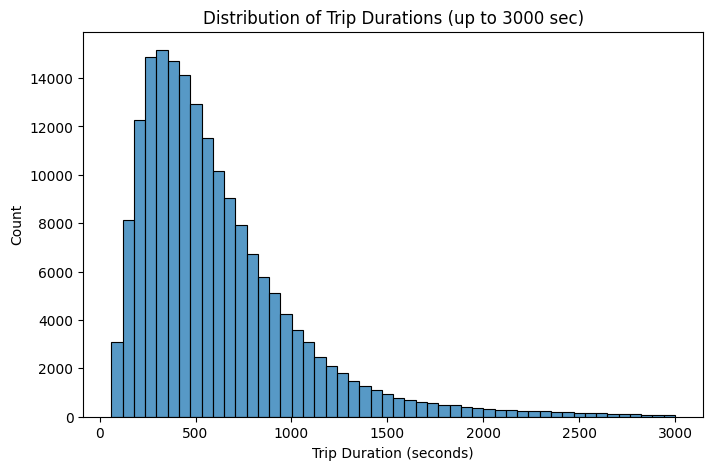

In [20]:
plt.figure(figsize=(8,5))
# Limit duration to 0–3000 seconds (50 minutes) to focus on typical trips,
# as most trips fall within this range and longer durations are less common
sns.histplot(df.loc[df['duration_sec'] <= 3000, 'duration_sec'], bins=50, kde=False)
plt.title('Distribution of Trip Durations (up to 3000 sec)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Count')
plt.show()

The histogram displays a right-skewed distribution, indicating that shorter trips are more common. The highest concentration of trips occurs around 500 seconds (approximately 8 minutes), which represents the peak of the distribution. While many trips fall below 3000 seconds, the frequency drops as duration increases, highlighting that quick rides dominate usage.

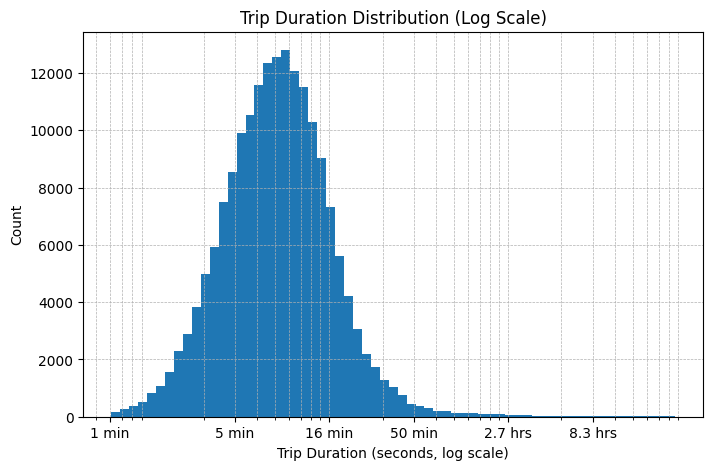

In [21]:
# we use a log scale on the x-axis. This helps reveal patterns in both short
# and long trips, and better handles the right-skewed distribution of the data.
# Create log-spaced bins for the histogram
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), 
                       np.log10(df['duration_sec'].max()) + log_binsize, 
                       log_binsize)

plt.figure(figsize=(8,5))
plt.hist(df['duration_sec'], bins=bins)
plt.xscale('log')
plt.title('Trip Duration Distribution (Log Scale)')
plt.xlabel('Trip Duration (seconds, log scale)')
plt.ylabel('Count')
plt.xticks([60, 300, 1000, 3000, 10000, 30000], ['1 min', '5 min', '16 min', '50 min', '2.7 hrs', '8.3 hrs'])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

While the majority of trips still cluster around the 5–10 minute range, the log scale makes it easier to observe the long tail of trips that extend into several hours.
This confirms that while most users take short rides, there is a non-negligible number of extended trips that would be hidden in a regular linear plot.

---

Next up, the first predictor variable of interest: `user_type`.

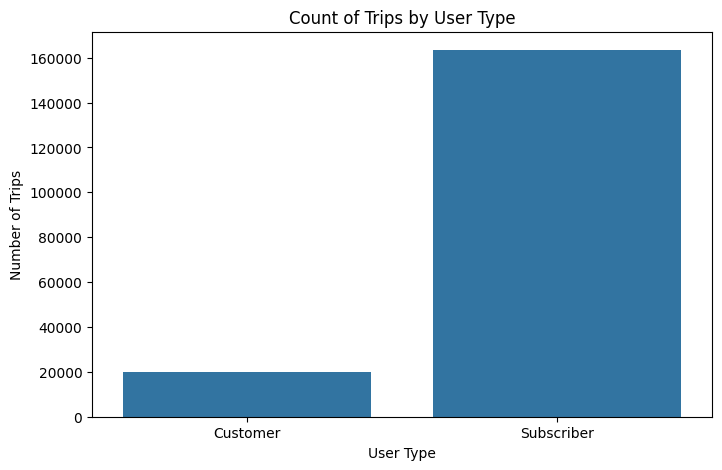

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='user_type')
plt.title('Count of Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

Most bike trips are taken by Subscribers, about 160000 trips, while Customers make around 20000 trips. This means that people with subscriptions use the bike service a lot more than casual or one-time riders.

---

Next up, the second predictor variable of interest: `member_gender`.

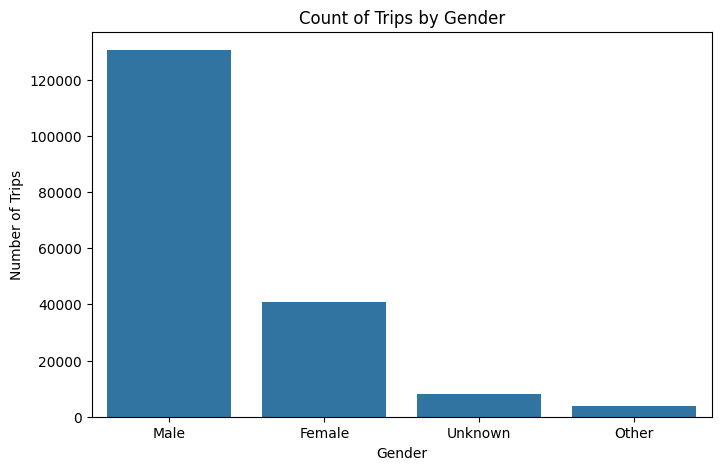

In [23]:
plt.figure(figsize=(8,5))
gender_order = df['member_gender'].value_counts().index

sns.countplot(data=df, x='member_gender', order=gender_order)
plt.title('Count of Trips by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

The chart shows that males take way more bike trips than other genders, over 120,000 trips, while women take around 40,000. This could mean that bike sharing is either more popular or easier to access for men. People who chose "Other" or didn't specify a gender took the least number of trips, showing they’re a much smaller group in this dataset.

---

Next up, the third predictor variable of interest: `age`.

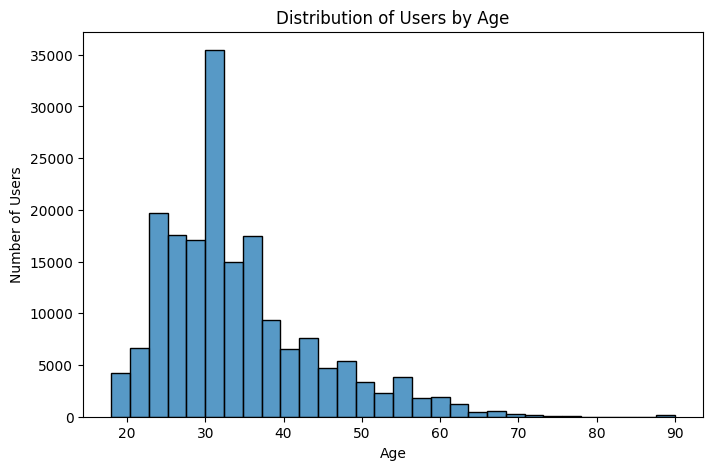

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=30, kde=False)
plt.title('Distribution of Users by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Most people who use the bikes are young adults, with the biggest group around age 33. A lot of users are between 24 and 36 years old. There are fewer older users, especially over age 50, and only a small number are as old as 90. These older ages might seem unusual, but we kept them in the chart since we don’t have enough info to know if they’re wrong.

---

Now, the next predictor variable of interest: `start_hour`.

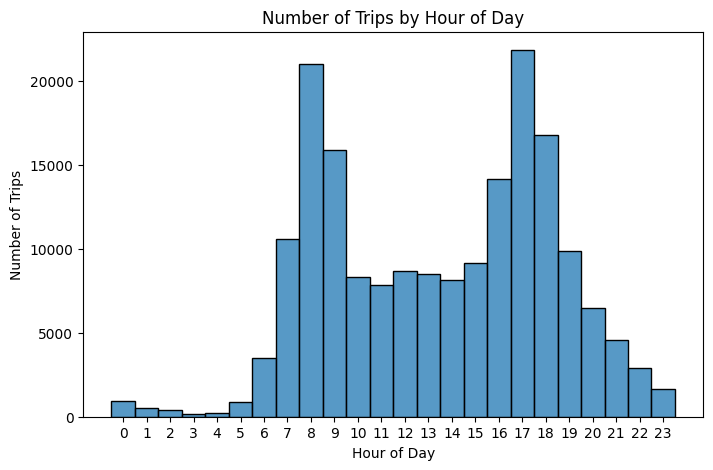

In [25]:
# Extract hour from start_time
df['start_hour'] = df['start_time'].dt.hour

plt.figure(figsize=(8,5))
sns.histplot(df['start_hour'], bins=24, discrete=True)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.show()

Most trips happen during daytime hours, with clear peaks around morning rush hours (7-9 AM) and evening (4-6 PM), indicating typical commute patterns.

---

Now, the next predictor variable of interest: `bike_share_for_all_trip`.

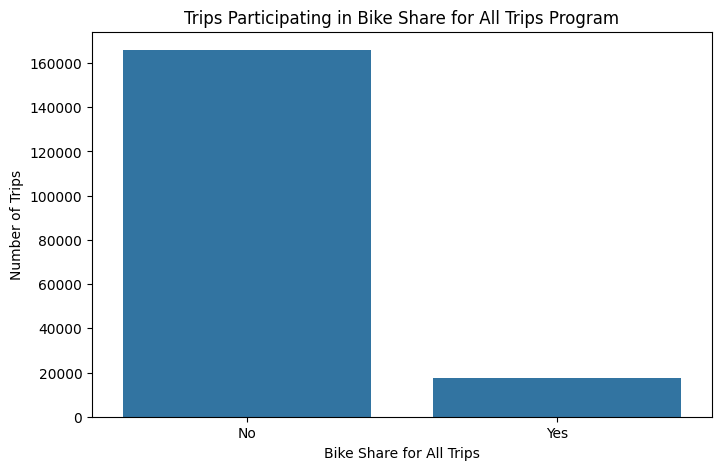

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='bike_share_for_all_trip')
plt.title('Trips Participating in Bike Share for All Trips Program')
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Number of Trips')
plt.show()

The majority of trips (about 160000) are not part of the Bike Share for All Trips program, while only around 20,000 trips are made by users who do participate in this program. This shows that most users don’t take advantage of this specific offering.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I looked at several variables, but my main focus was on trip duration. Most trip durations were short, and the number of trips went down as the duration goes up. There were also some really long trips, which made the chart harder to read, so I used a log scale to show the full range in a clearer way.
>
>For `age`, I found that most riders were between 24 and 36 years old, with a peak around age 33. There were also a few people in their 80s or 90s, rare but still possible, so I kept them.
>
>I also looked at what time of day trips happen by pulling the hour from the `start_time`. As expected, most rides happen during morning and evening hours, likely when people are commuting.
>
>No major cleaning was needed at this point, I just created a new `start_hour` column from `start_time`.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, a few things. The trip duration had a long tail meaning some trips were extremely long, which made it harder to see patterns in the shorter trips. To fix that, I used a log scale chart so I could show both short and long trips better.
>
> Also, I created an age column by subtracting the birth year from 2019 (the year of the data), to make it easier to understand than using raw birth years.
>
>I didn’t have to clean anything new during this part because most of the cleaning, like fixing birth years or missing values, was already done earlier.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between the numerical features in the data.

In [27]:
corr = df.corr(numeric_only = True)
remove from the result lng_trip and start hou

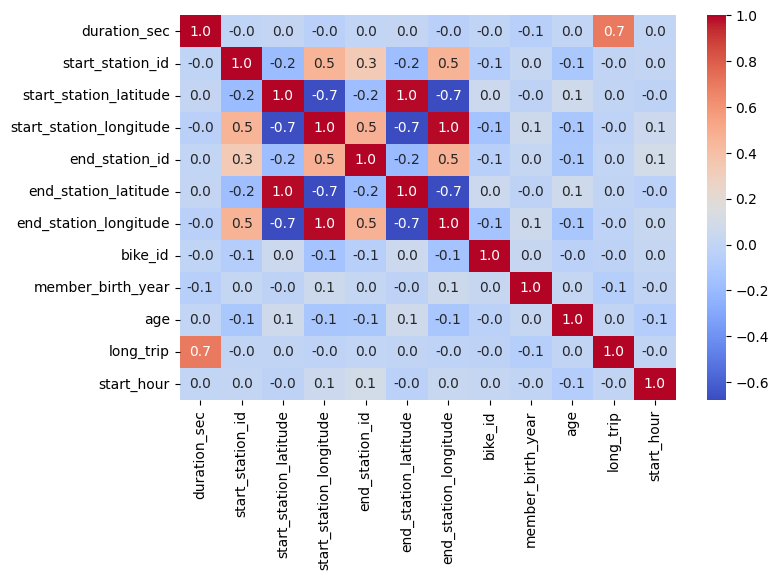

In [41]:
plt.figure(figsize = [8, 5])
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '0.1f');

The heatmap shows a strong positive correlation between `duration_sec` and `long_trip`, a perfect negative correlation between `age` and `member_birth_year`, and a spatial pattern indicated by negative correlations between latitudes and longitudes. Moderate correlations between station IDs and longitudes suggest a geographic ordering, while other variables like `bike_id`, `start_hour`, and `member_birth_year` show minimal linear relationships with the rest.

---

In [57]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'Int64'])
print((numeric_df < 0).sum())

duration_sec                    0
start_station_id                0
start_station_latitude          0
start_station_longitude    183215
end_station_id                  0
end_station_latitude            0
end_station_longitude      183215
bike_id                         0
member_birth_year               0
age                             0
dtype: Int64


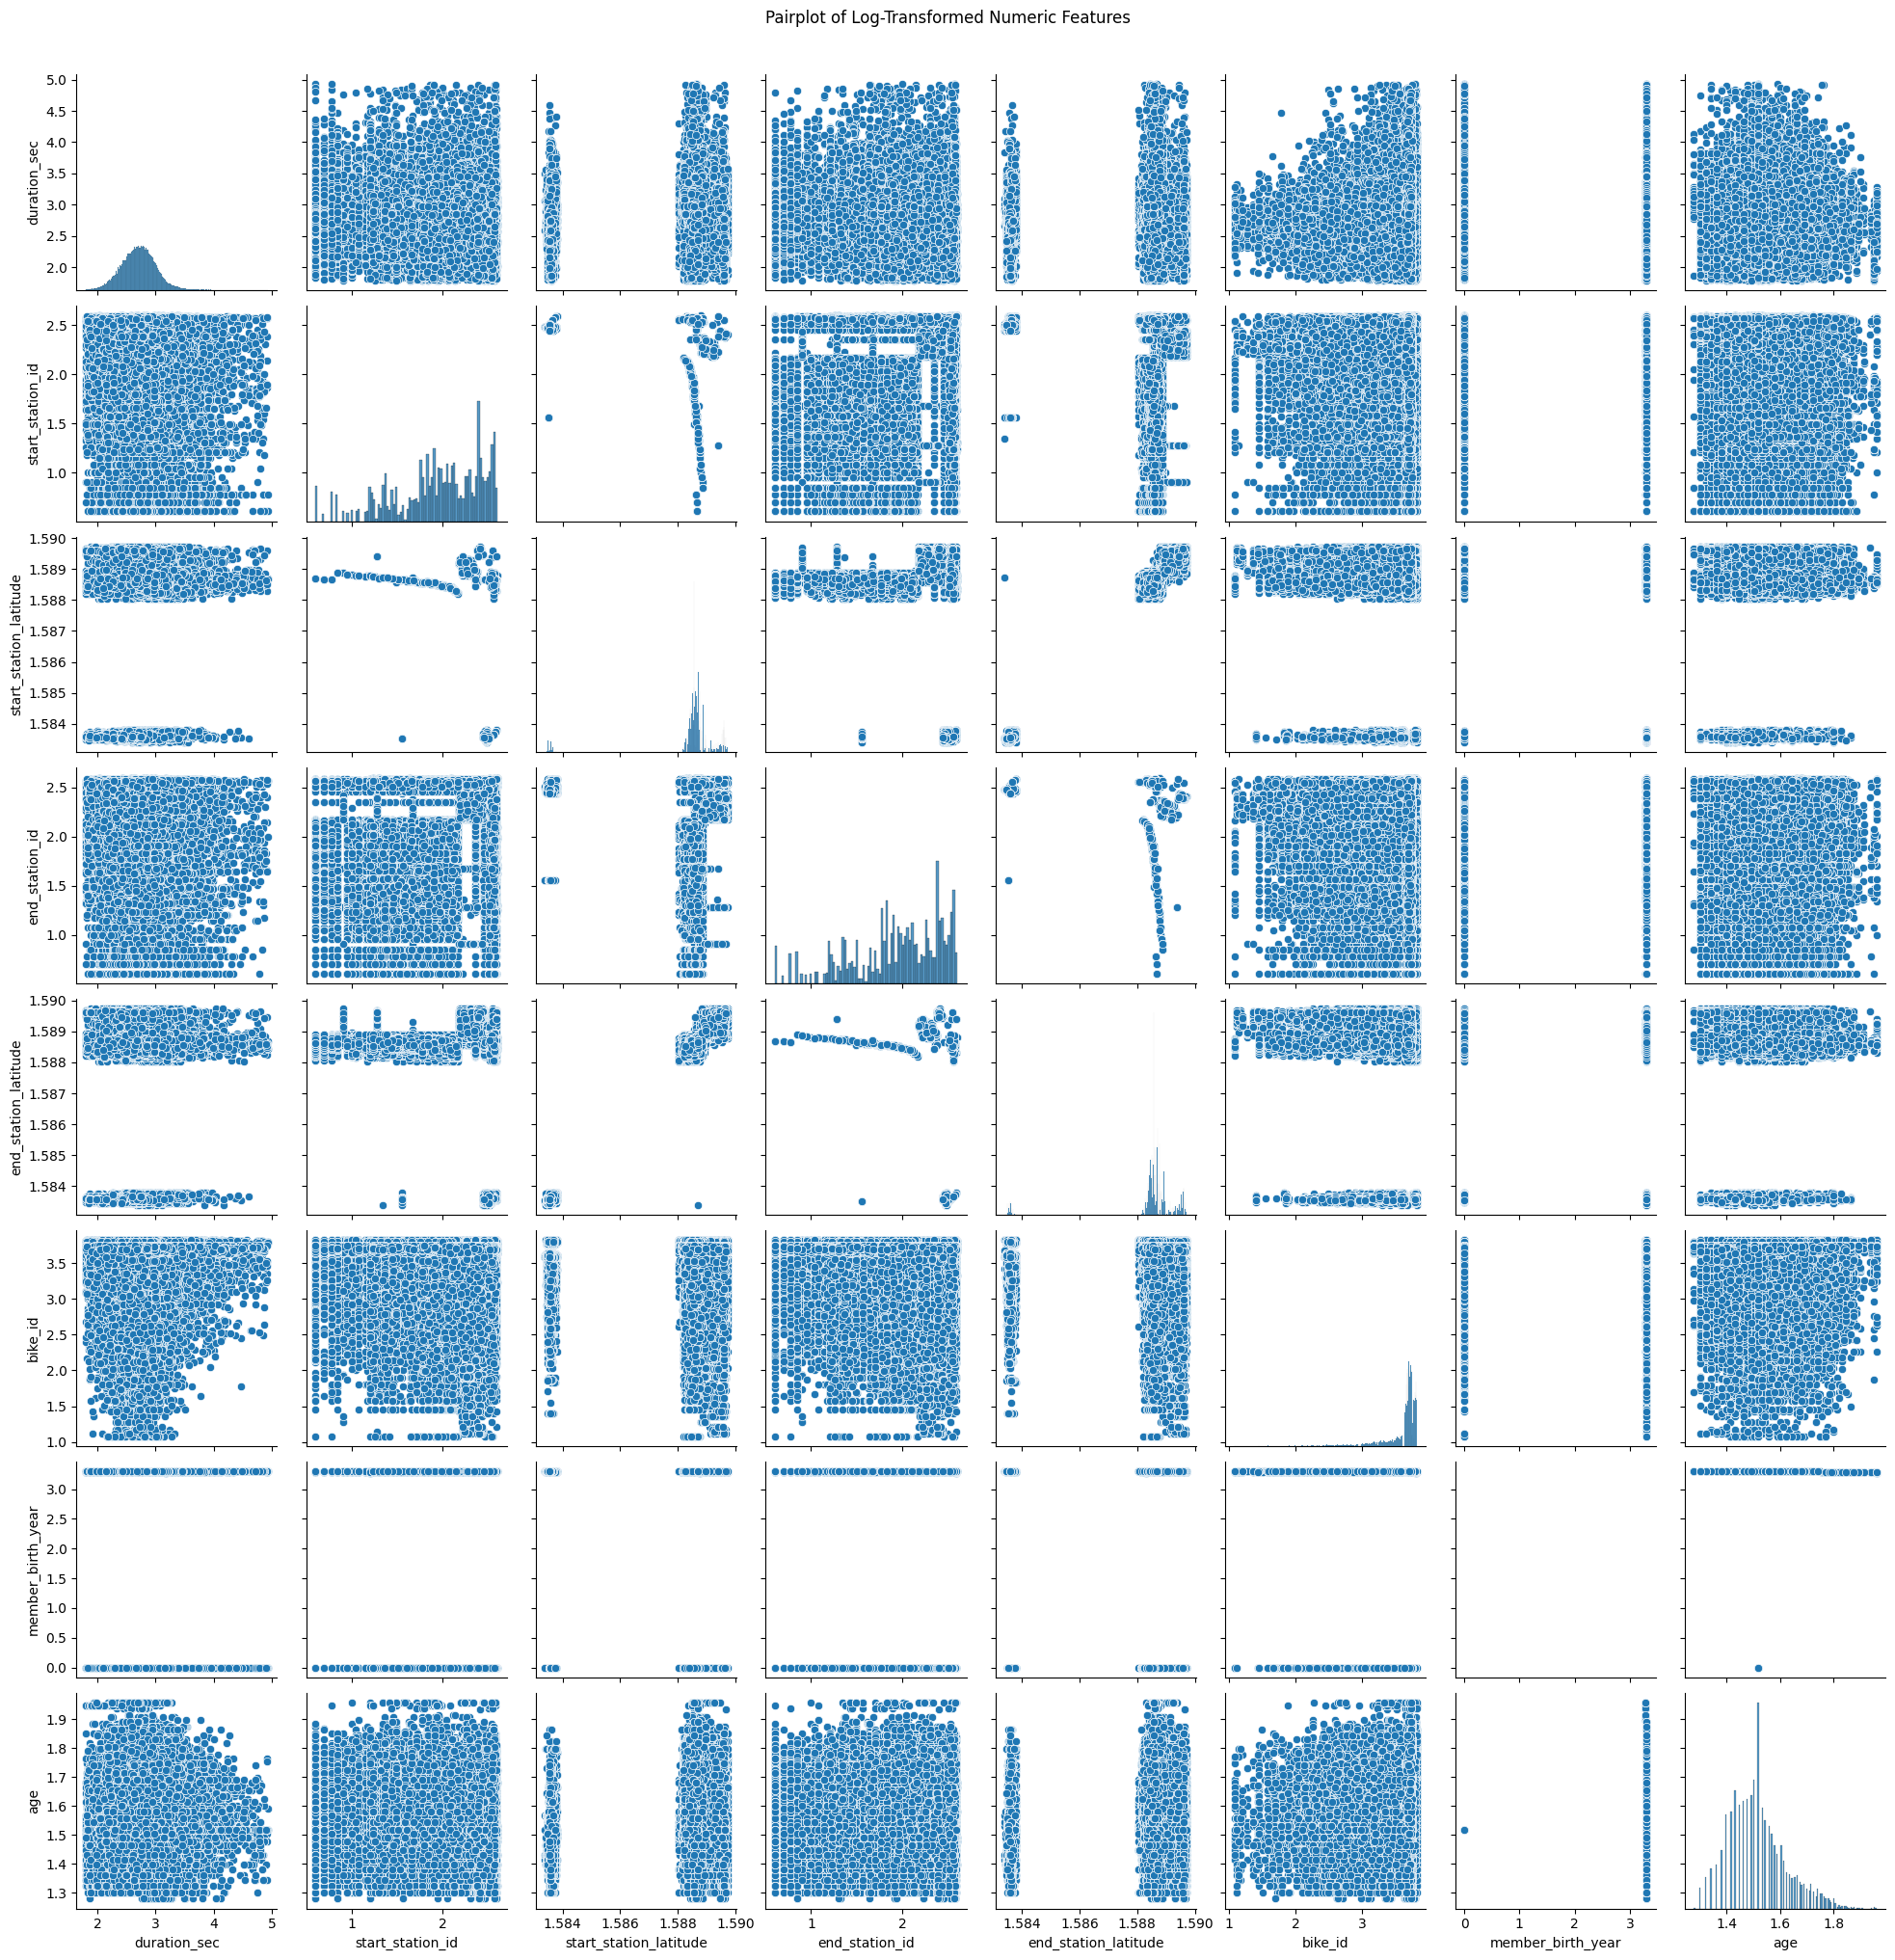

In [58]:
# numeric columns except the longitude columns with negatives
numeric_cols = [col for col in numeric_df.columns if 'longitude' not in col]

# log transform only to these columns
numeric_log = numeric_df[numeric_cols].apply(lambda col: np.log10(col + 1))

sns.pairplot(numeric_log)
plt.suptitle('Pairplot of Log-Transformed Numeric Features', y=1.02)
plt.show()

The log transformed plot makes it easier to spot patterns that were hidden before. Like younger users seem to take slightly longer trips, and features like station IDs and bike IDs clearly act as categorical variables. While there are no strong linear relationships, the transformation helps highlight trends like potential geographic patterns.

---

Now, lets see the relation between `duration_sec` and `user_type`.

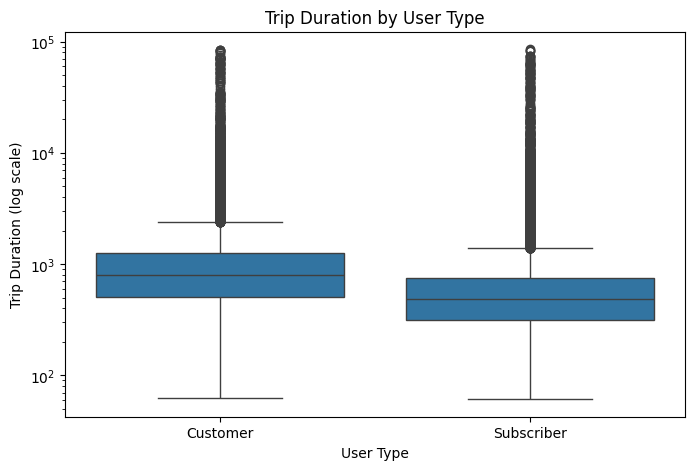

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='user_type', y='duration_sec')
plt.yscale('log')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (log scale)')
plt.show()

The box plot shows that customers generally take longer trips than subscribers. This is visible by their higher median and wider range of trip durations. An alogarithmic scale used on the y-axis to handle the large spread in trip durations, especially because some trips are extremely long. Both groups show outliers, but customers have more extreme cases, suggesting that their trip durations are more varied.


---

Now, lets see the relation between `duration_sec` and `age`.

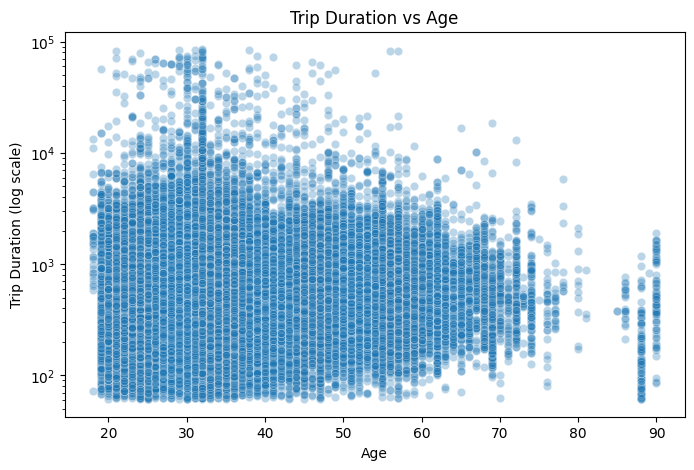

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='duration_sec', alpha=0.3)
plt.yscale('log')
plt.title('Trip Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (log scale)')
plt.show()

The scatter plot shows that younger users (especially those under 40) tend to take longer and more varied trips, with many outliers representing high trip durations. As age increases, trip durations tend to decrease and become more consistent, indicating that older users usually take shorter, more uniform rides.
The y-axis is plotted on a logarithmic scale, which helps to clearly display the wide range of trip durations and better visualize patterns across age groups.

---

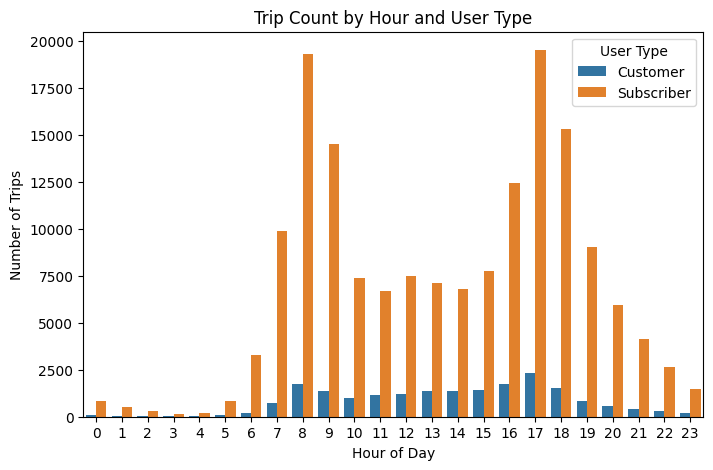

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='start_hour', hue='user_type')
plt.title('Trip Count by Hour and User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

The plot shows that both Subscribers and Customers are most active during the morning (around 8 AM) and evening (around 5 PM) hours. However, Subscribers dominate these peak times, likely reflecting commuting patterns. Customers, on the other hand, have a more even distribution throughout the day, suggesting they may use the service more for irregular trips.

---

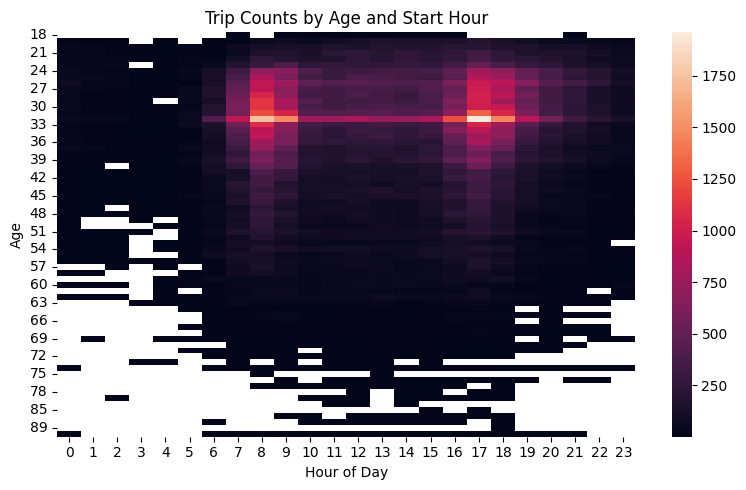

In [61]:
# groupby age and start_hour to count trips
age_hour_counts = df.groupby(['age', 'start_hour']).size().reset_index(name='trip_count')
heatmap_data = age_hour_counts.pivot(index='age', columns='start_hour', values='trip_count')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data)
plt.title('Trip Counts by Age and Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

The heatmap shows that most bike trips are concentrated among users in their late 20s to mid-30s, especially during typical commute hours around 8 AM and 5 PM. This suggests that younger adults are the primary users of the bike-sharing system and likely use it for commuting to and from work. As age increases, trip frequency noticeably decreases, indicating that older age groups are less active in using the service.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this part of the analysis I focused on how trip duration varies across different user characteristics. The box plot comparing user types showed that Customers tend to take longer trips than Subscribers, while both groups include a range of durations with outliers. The scatter plot between age and trip duration showed that younger users (under 40) generally take longer or more varied trips, while older users tend to take shorter, more consistent trips. These patterns may reflect different motivations for bike usage.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, several interesting patterns appeared in the other features. The heatmap of age and start hour showed that bike usage peaks during the morning (around 8 AM) and evening (around 5 PM), especially among users aged 25–35, which aligns with typical work commute hours. Also the count plot of trips by user type and hour showed that subscribers dominate during peak hours, while customers are more evenly distributed throughout the day, maening that subscribers use the service more for regular commuting, while Customers may use it more casually. In conclusion age, time, and user type all show meaningful relationships that help explain how and when the service is used.

## Multivariate Exploration

Now we want to investigate how trip duration, user type, and gender interact with hour of day. 

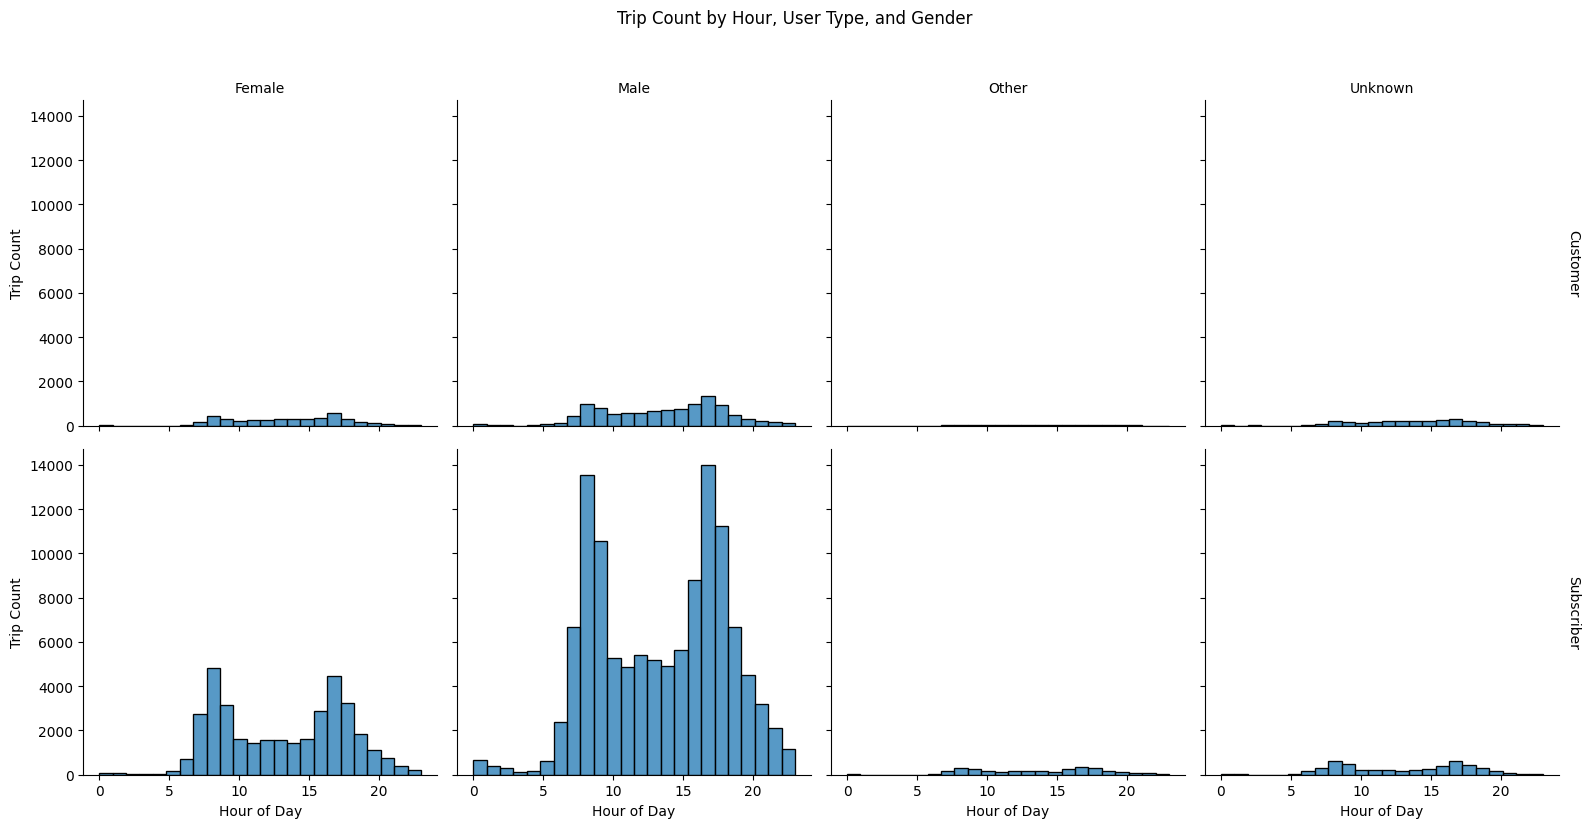

In [63]:
# Limit duration to 3000 sec to avoid long-tail distortion
filtered_df = df[df['duration_sec'] <= 3000]

g = sns.FacetGrid(filtered_df, col='member_gender', row='user_type', height=4, margin_titles=True)
g.map(sns.histplot, 'start_hour', bins=24)

g.set_axis_labels("Hour of Day", "Trip Count")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.suptitle('Trip Count by Hour, User Type, and Gender', y=1.03)
plt.tight_layout()
plt.show()

The plot shows clear patterns in how people use the bike-sharing service throughout the day based on their gender and user type. Subscribers, especially males, take the most trips, mainly during morning and evening rush hours likely for commuting. Customers, on the other hand, ride more during the middle of the day, which suggests they're using the service for casual or recreational purposes. In conclusion the plot highlights that the majority of rides come from male subscribers, while other genders and customer type users take fewer and more scattered trips.

---

To reduce clutter and improve readability, we randomly sampled 5,000 trips with durations up to 3,000 seconds, then plotted a scatterplot showing the relationship between age and trip duration, while differentiating users by their subscription type and participation in the Bike Share for All Trips program using colors and marker styles.

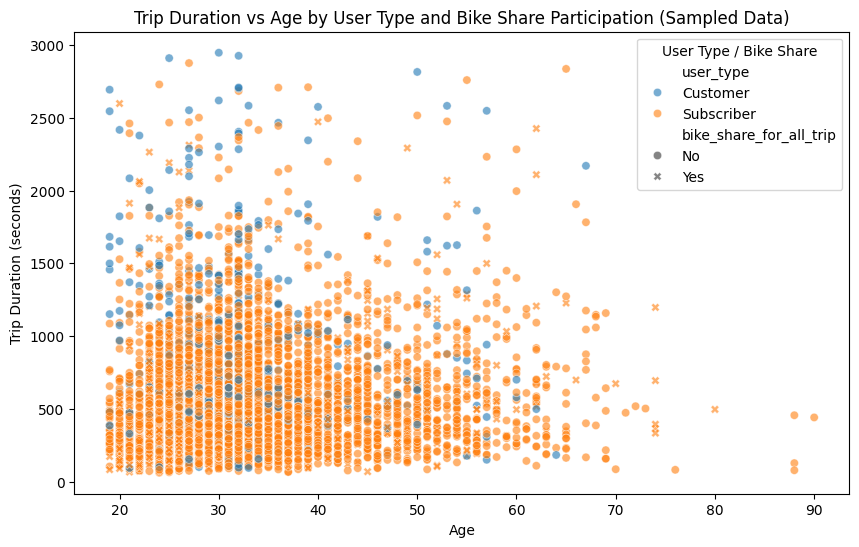

In [65]:
sample_df = df[df['duration_sec'] <= 3000].sample(5000, random_state=42)

plt.figure(figsize=(10,6))
sns.scatterplot(data=sample_df, 
                x='age', 
                y='duration_sec', 
                hue='user_type', 
                style='bike_share_for_all_trip', 
                alpha=0.6)
plt.title('Trip Duration vs Age by User Type and Bike Share Participation (Sampled Data)')
plt.xlabel('Age')
plt.ylabel('Trip Duration (seconds)')
plt.legend(title='User Type / Bike Share')
plt.show()

The plot shows that younger users tend to have a wider range of trip durations, with some long trips, especially among customers. subscribers generally have shorter and more consistent trip durations. Participation in the bike share for all trips program does not appear to drastically change this overall pattern but adds some variation within user groups.

---

To explore how trip duration relates to age, user type, bike share participation, and gender, we sampled 300 trips from the data and created a FacetGrid scatter plot. This plot breaks down the data by user type and bike share participation, while using color and marker style to distinguish genders. The trip duration axis is shown on a log scale to better display the wide range of trip lengths.

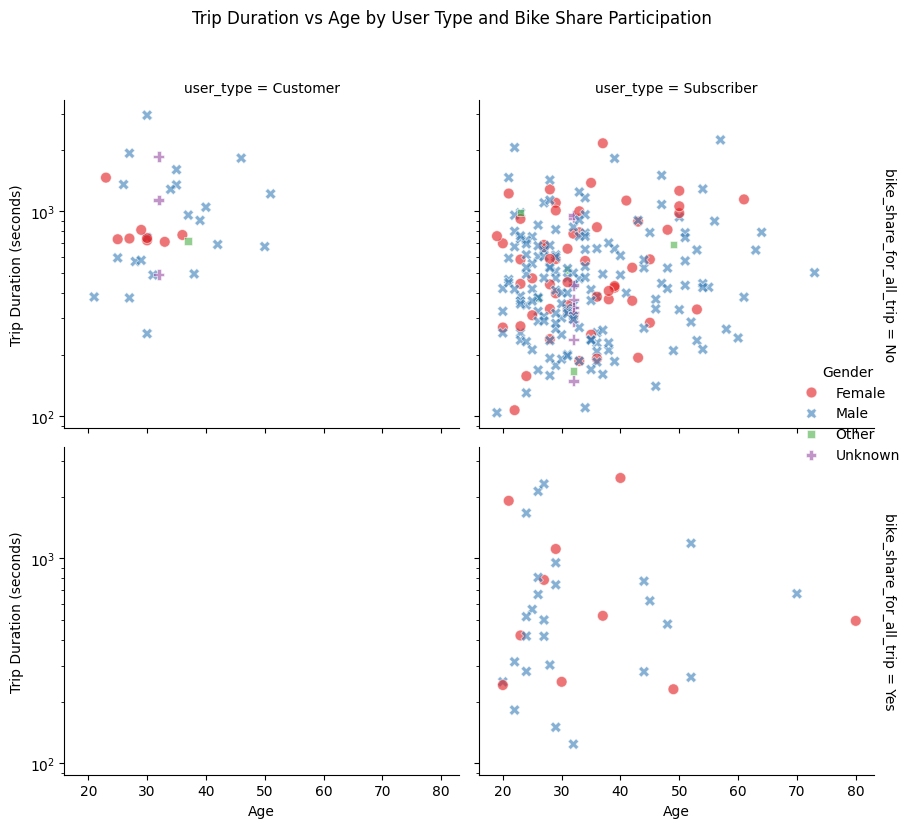

In [72]:
sampled_df = filtered_df.sample(n=300, random_state=42)

g = sns.FacetGrid(sampled_df, col='user_type', row='bike_share_for_all_trip', height=4, margin_titles=True)

g.map_dataframe(
    sns.scatterplot,
    x='age',
    y='duration_sec',
    hue='member_gender',
    style='member_gender', 
    alpha=0.6,
    palette='Set1',
    s=60  
)

g.set_axis_labels("Age", "Trip Duration (seconds)")
g.set(yscale='log')
g.add_legend(title='Gender')
plt.suptitle('Trip Duration vs Age by User Type and Bike Share Participation', y=1.03)
plt.tight_layout()
plt.show()


The plot reveals that younger users tend to have more varied trip durations, with some longer trips mainly among Customers who do not participate in the Bike Share program. Subscribers generally take shorter trips, and males appear more frequently across all groups. The log scale helps highlight differences in trip durations more clearly, showing distinct usage patterns across gender, user type, and bike share status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We found that user type and bike share participation together give a clearer picture of trip duration and age patterns. Like Subscribers who participate in the Bike Share program generally take shorter trips compared to Customers who don’t participate. Adding gender as a third factor also helped highlight that males tend to take more trips across all groups.


### Were there any interesting or surprising interactions between features?

> That Customers who don’t participate in the Bike Share program have more long trips, especially among younger riders, while Subscribers show shorter and more consistent trip durations regardless of gender. It was also surprising to see that gender differences persist across all groups, with males consistently making up the majority of trips.

## Conclusions

From this analysis, we looked at bike trip data to observe the difference in trip duration based on different user and trip features. From the univariate analysis, we learned that trip durations are very right skewed with most of the trips taking less than 50 minutes, and most users are subscribers with males taking the most trips across the board. Distribution by age showed the dominance of riders in the younger to middle aged group with some older riders.

In bivariate analysis, we learned that customers take longer trips than subscribers, and trip length tends to be shorter with age. Time patterns showed subscribers commuting by bike mostly during regular commute hours, while customers commute more at lunch time, which suggests possibly different uses.

Finally, the multivariate exploration revealed more nuanced insights. Combining user type, bike share participation, and gender showed that subscribers using the Bike Share program tend to take shorter, more consistent trips. Customers not in the program, especially younger males, had longer and more varied trip durations. These interactions highlight the importance of considering multiple factors to understand trip behaviors better.

Throughout the exploration, we applied transformations such as log scaling to better visualize skewed distributions, handled outliers carefully, and sampled data when necessary to make plots clearer. These steps helped uncover meaningful patterns while managing data challenges like outliers and skewed variables.